In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics
from ultralytics import YOLO
import zipfile
import os
import shutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.9 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
dataset_config = """
train: /kaggle/input/food-detection-1/train/images
val: /kaggle/input/food-detection-1/valid/images
test: /kaggle/input/food-detection-1/test/images

nc: 30
names: ['apple', 'beef', 'cabbage', 'carrot', 'chicken', 'chilli', 'coriander', 'cucumber', 'egg', 'fish', 'garlic', 'ginger', 'honey', 'lemon', 'lime', 'milk', 'mushroom', 'noodle', 'onion', 'orange', 'parsley', 'peanut', 'pork', 'potato', 'prawn', 'rice', 'spring_onion', 'stock', 'tomato', 'yoghurt']
"""

# Define the new writable path
config_path = '/kaggle/working/data.yaml'

# Save the configuration file to the writable path
with open(config_path, 'w') as f:
    f.write(dataset_config)

print("Configuration file saved successfully.")

Configuration file saved successfully.


In [3]:
# Initialize YOLO model with pretrained weights
model = YOLO('yolov8m.pt')  

100%|██████████| 49.7M/49.7M [00:00<00:00, 274MB/s]


In [4]:
model.train(
    data='/kaggle/input/food-detection-1/data.yaml',  # Path to data.yaml
    epochs=80,                  # Set number of training epochs
    augment=True,
    batch=16,                   # Set batch size
    patience=20,
    imgsz=640,                    # Image size
    project='ingredient-detection',  # Project name
    name='yolov8_ingredient',   # Model name
    device=0                    # Set to 'cpu' or '0' for the first GPU
)

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/food-detection-1/data.yaml, epochs=80, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=ingredient-detection, name=yolov8_ingredient, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]
2024-11-11 09:20:54,213	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-11 09:20:55,546	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 62.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/food-detection-1/train/labels... 13180 images, 262 backgrounds, 0 corrupt: 100%|██████████| 13180/13180 [01:25<00:00, 153.37it/s]

train: WARNING ⚠️ /kaggle/input/food-detection-1/train/images/page_2_product_10_image_0_jpg.rf.a1d39619f0182fc994a47382b0822b7e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/food-detection-1/train/images/page_5_product_1_image_0_jpg.rf.a0583e41c081f3bc58d3c8ef602d5131.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/food-detection-1/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12307, len(boxes) = 31379. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/food-detection-1/valid/labels... 1636 images, 48 backgrounds, 0 corrupt: 100%|██████████| 1636/1636 [00:07<00:00, 219.45it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/food-detection-1/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1587, len(boxes) = 3905. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to ingredient-detection/yolov8_ingredient/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to ingredient-detection/yolov8_ingredient
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Si

       1/80      6.92G      1.058      2.495       1.41         61        640: 100%|██████████| 824/824 [06:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.23it/s]


                   all       1636       3905      0.542      0.434      0.454       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      6.78G      1.019      1.587      1.337         72        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.39it/s]


                   all       1636       3905      0.447      0.401      0.393      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      6.84G      1.118      1.734      1.408         47        640: 100%|██████████| 824/824 [06:48<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.32it/s]


                   all       1636       3905       0.51      0.405      0.389      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      6.86G      1.195      1.844      1.459         51        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.36it/s]


                   all       1636       3905      0.523      0.442      0.444       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      6.83G      1.151      1.707      1.437         57        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]


                   all       1636       3905      0.387      0.364      0.341      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      6.81G      1.106       1.57      1.404         31        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]


                   all       1636       3905      0.567       0.51      0.527      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      6.83G      1.074      1.472      1.378         50        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.614      0.519      0.552      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      6.85G      1.048      1.398      1.361         36        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.599      0.598      0.592      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      6.84G      1.026      1.314      1.339         40        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]


                   all       1636       3905      0.615      0.594      0.609      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      6.85G      1.004      1.264      1.331         57        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]


                   all       1636       3905       0.63      0.597      0.624      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      6.84G     0.9913      1.197       1.32         74        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.673      0.587      0.636       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      6.86G     0.9681      1.161      1.306         43        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.656      0.604      0.622      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      6.84G     0.9481      1.118      1.292        126        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.36it/s]

                   all       1636       3905      0.669      0.629      0.667      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      6.81G     0.9452      1.099      1.288         36        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.633       0.64      0.664      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      6.84G      0.936      1.064      1.282         36        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]

                   all       1636       3905      0.678      0.641      0.671      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      6.87G     0.9171      1.031      1.269         58        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.693      0.627      0.675       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      6.87G     0.9128      1.008      1.267         42        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]

                   all       1636       3905      0.703      0.627      0.685      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      6.84G     0.8948     0.9888      1.254         88        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.722      0.636      0.686      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      6.86G     0.8796      0.957       1.24         38        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.42it/s]

                   all       1636       3905      0.719      0.653      0.693      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      6.82G     0.8784     0.9267      1.237         53        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]

                   all       1636       3905      0.693      0.643      0.687      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      6.84G     0.8649     0.9141      1.232         62        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.42it/s]

                   all       1636       3905      0.706      0.636      0.701      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      6.84G     0.8535     0.8998      1.227         64        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.42it/s]

                   all       1636       3905      0.687      0.657      0.704       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      6.87G     0.8501     0.8859      1.224         46        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]

                   all       1636       3905       0.72       0.67      0.724      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      6.85G     0.8449     0.8729      1.221         64        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]

                   all       1636       3905      0.754      0.674      0.727      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      6.89G     0.8326     0.8502      1.211         36        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.735      0.674      0.717      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      6.85G     0.8298     0.8366       1.21         88        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.767      0.669       0.73      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      6.82G      0.826      0.825      1.209         74        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.39it/s]

                   all       1636       3905      0.716      0.678      0.727      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      6.84G     0.8134     0.8064        1.2         94        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.726      0.698      0.734      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      6.84G     0.8068     0.7856      1.194         47        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.788      0.658      0.738       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      6.88G     0.8016      0.779      1.191         47        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905       0.78      0.677      0.733      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      6.82G     0.7894     0.7647      1.185         28        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.42it/s]

                   all       1636       3905       0.72      0.698      0.734      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      6.85G      0.791     0.7598      1.183         58        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.22it/s]

                   all       1636       3905      0.724      0.707      0.742      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      6.83G     0.7769     0.7422      1.175         68        640: 100%|██████████| 824/824 [06:50<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.711      0.721       0.74      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      6.83G     0.7671     0.7341      1.164         52        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.26it/s]

                   all       1636       3905      0.743      0.698      0.747       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      6.84G     0.7717     0.7285      1.172         49        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.25it/s]

                   all       1636       3905      0.742        0.7      0.743       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      6.83G     0.7618     0.7036      1.161         46        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.27it/s]

                   all       1636       3905      0.742      0.708      0.755      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      6.83G     0.7635     0.7072      1.161         39        640: 100%|██████████| 824/824 [06:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.27it/s]

                   all       1636       3905      0.753      0.702      0.744      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      6.83G     0.7548     0.6925      1.156         29        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.761      0.709      0.742      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      6.85G     0.7448     0.6808      1.148         94        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.797      0.696      0.747      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      6.81G     0.7357     0.6656      1.145         39        640: 100%|██████████| 824/824 [06:50<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.26it/s]

                   all       1636       3905      0.738      0.709      0.745      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      6.85G     0.7349     0.6591      1.141         48        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.761      0.699      0.747      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      6.83G     0.7356     0.6608      1.143         59        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.795      0.701       0.75      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      6.91G     0.7235     0.6463      1.136         42        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.27it/s]

                   all       1636       3905      0.807      0.701      0.758      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      6.85G     0.7152     0.6347      1.128         54        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.20it/s]

                   all       1636       3905      0.762      0.709      0.755      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      6.83G      0.709     0.6266      1.125         34        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.22it/s]

                   all       1636       3905      0.769      0.695      0.753      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      6.84G     0.7051     0.6198      1.127         39        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.24it/s]

                   all       1636       3905      0.771      0.703      0.754      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      6.81G     0.7018     0.6131      1.122         41        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.22it/s]

                   all       1636       3905      0.777      0.696      0.755      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      6.86G     0.6959     0.6007      1.118         43        640: 100%|██████████| 824/824 [06:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.35it/s]

                   all       1636       3905      0.741      0.733      0.759      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      6.85G     0.6943     0.6011      1.116         50        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.22it/s]

                   all       1636       3905      0.772        0.7      0.756      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      6.82G     0.6915     0.5875      1.115         62        640: 100%|██████████| 824/824 [06:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.29it/s]

                   all       1636       3905       0.78      0.708      0.758       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      6.85G     0.6791     0.5759      1.111         57        640: 100%|██████████| 824/824 [06:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.34it/s]

                   all       1636       3905      0.773      0.712      0.758      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      6.87G     0.6776     0.5717       1.11         90        640: 100%|██████████| 824/824 [06:50<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.768      0.708      0.758       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      6.84G     0.6698     0.5638      1.105         55        640: 100%|██████████| 824/824 [06:50<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.39it/s]

                   all       1636       3905      0.789      0.703      0.759      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      6.81G      0.667     0.5566      1.102         48        640: 100%|██████████| 824/824 [06:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.28it/s]

                   all       1636       3905      0.777       0.71      0.757      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      6.85G     0.6574      0.553      1.097         43        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.765      0.713      0.758      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      6.83G     0.6596     0.5462      1.094         32        640: 100%|██████████| 824/824 [06:50<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.26it/s]

                   all       1636       3905      0.764      0.717      0.758      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      6.86G     0.6511     0.5352      1.086         49        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.23it/s]

                   all       1636       3905      0.757      0.718      0.761      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      6.84G     0.6464     0.5334      1.084         51        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.28it/s]

                   all       1636       3905      0.762      0.716      0.759      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      6.82G     0.6409     0.5278      1.086         44        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.27it/s]

                   all       1636       3905      0.758      0.722      0.759      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      6.86G     0.6341      0.515      1.079         47        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.28it/s]

                   all       1636       3905      0.766      0.719      0.761      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      6.82G     0.6337     0.5115       1.08         42        640: 100%|██████████| 824/824 [06:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.26it/s]

                   all       1636       3905       0.78      0.711       0.76      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      6.85G     0.6225     0.4984      1.078         68        640: 100%|██████████| 824/824 [06:52<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.26it/s]

                   all       1636       3905      0.785      0.711       0.76      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      6.86G     0.6267     0.5031      1.078         38        640: 100%|██████████| 824/824 [06:53<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.26it/s]

                   all       1636       3905      0.782      0.713      0.759      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      6.84G     0.6177     0.4936      1.071         81        640: 100%|██████████| 824/824 [06:53<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:23<00:00,  2.26it/s]

                   all       1636       3905      0.785      0.711      0.759      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      6.83G     0.6138     0.4845      1.068         56        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.36it/s]

                   all       1636       3905      0.789      0.706      0.759      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      6.84G     0.6035     0.4761      1.059         53        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.791      0.701      0.757      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      6.85G      0.597     0.4737      1.059         53        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.40it/s]

                   all       1636       3905      0.801      0.696      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      6.85G     0.5954     0.4685      1.056         49        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.763       0.72      0.756      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      6.87G     0.5934     0.4649      1.057         67        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.34it/s]

                   all       1636       3905       0.76      0.721      0.756      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      6.87G     0.5889     0.4575      1.052         43        640: 100%|██████████| 824/824 [06:49<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.763      0.719      0.756      0.593


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      6.83G     0.5026     0.3495     0.9959         17        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.36it/s]

                   all       1636       3905      0.772      0.714      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      6.82G     0.4934     0.3416     0.9872         31        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.783      0.706      0.756      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      6.84G     0.4859     0.3286     0.9822         22        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.781      0.706      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      6.84G     0.4751      0.319     0.9783         57        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.781      0.707      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      6.82G     0.4717     0.3147     0.9784         52        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.776      0.709      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80       6.8G     0.4647     0.3076      0.972         15        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.765      0.715      0.756      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      6.91G     0.4598     0.3027     0.9662         27        640: 100%|██████████| 824/824 [06:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]

                   all       1636       3905      0.769      0.715      0.756      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      6.81G     0.4529     0.2981     0.9617         41        640: 100%|██████████| 824/824 [06:47<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.37it/s]

                   all       1636       3905      0.771      0.717      0.756      0.592
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



78 epochs completed in 9.396 hours.
Optimizer stripped from ingredient-detection/yolov8_ingredient/weights/last.pt, 52.1MB
Optimizer stripped from ingredient-detection/yolov8_ingredient/weights/best.pt, 52.1MB

Validating ingredient-detection/yolov8_ingredient/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,857,130 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:44<00:00,  1.17it/s]


                   all       1636       3905      0.744      0.735      0.765      0.601
                 apple         34        141      0.845      0.733      0.806       0.52
                  beef         60        122      0.759       0.67      0.767      0.455
               cabbage         54         66      0.794       0.97      0.962      0.753
                carrot         68         84      0.772      0.881      0.886       0.72
               chicken         18         41       0.53          1      0.856      0.783
                chilli         89        563      0.724      0.703      0.732      0.509
             coriander          5          6          0          0     0.0721     0.0476
              cucumber         25         28      0.814      0.627      0.695      0.449
                   egg         68        130      0.893      0.854       0.89      0.674
                  fish         43        140      0.804      0.703      0.758      0.543
                garli

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5acdda7820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
# Evaluate on validation set
metrics = model.val(data='/kaggle/input/food-detection-1/data.yaml', split='val')

In [7]:
# Load training metrics and print column names
import pandas as pd
training_log_path = '/kaggle/working/ingredient-detection/yolov8_ingredient/results.csv'  # Update path if different

try:
    training_log = pd.read_csv(training_log_path)
    print("Available columns:", training_log.columns)
except FileNotFoundError:
    print("Training log not found. Please check the path to the training results.")


Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


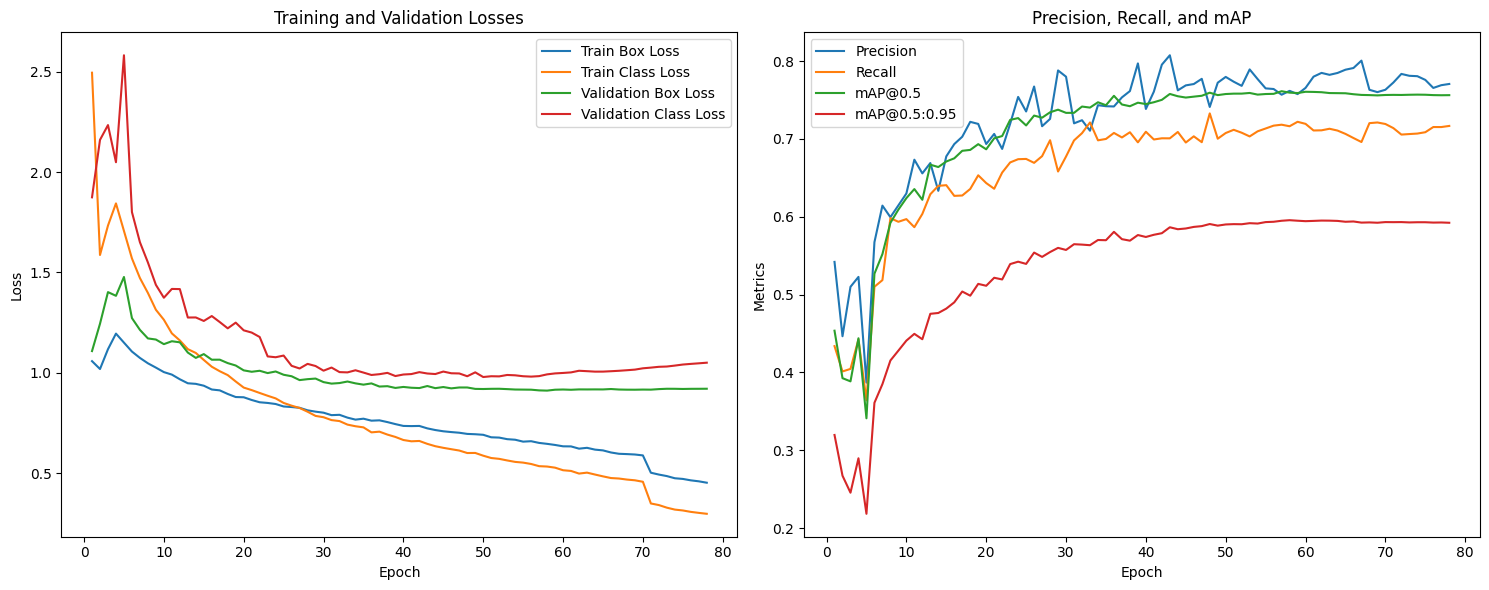

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the training log
training_log_path = '/kaggle/working/ingredient-detection/yolov8_ingredient/results.csv'  # Adjust path if needed
training_log = pd.read_csv(training_log_path)

# Plot training and validation losses
plt.figure(figsize=(15, 6))

# Subplot 1: Training and Validation Losses
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['train/box_loss'], label='Train Box Loss')
plt.plot(training_log['epoch'], training_log['train/cls_loss'], label='Train Class Loss')
plt.plot(training_log['epoch'], training_log['val/box_loss'], label='Validation Box Loss')
plt.plot(training_log['epoch'], training_log['val/cls_loss'], label='Validation Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Subplot 2: Precision, Recall, and mAP Metrics
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['metrics/precision(B)'], label='Precision')
plt.plot(training_log['epoch'], training_log['metrics/recall(B)'], label='Recall')
plt.plot(training_log['epoch'], training_log['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(training_log['epoch'], training_log['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP')
plt.legend()

plt.tight_layout()
plt.show()